In [58]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [59]:
data = pd.read_csv('data.csv')
print(data.head())
print('\n Data Types:')
print(data.dtypes)

  Symbol        Date       High        Low      Close       Open    Volume  \
0   YHOO  2015-01-02  50.779999  49.470001  50.169998  50.660000  11924500   
1   YHOO  2015-01-05  49.880001  48.910000  49.130001  49.709999  14389300   
2   YHOO  2015-01-06  49.880001  48.330002  49.209999  49.200001  16204300   
3   YHOO  2015-01-07  49.639999  48.509998  48.590000  49.619999  11788000   
4   YHOO  2015-01-08  50.230000  48.720001  50.230000  48.990002  14704800   

   Adj_Close  
0  50.169998  
1  49.130001  
2  49.209999  
3  48.590000  
4  50.230000  

 Data Types:
Symbol        object
Date          object
High         float64
Low          float64
Close        float64
Open         float64
Volume         int64
Adj_Close    float64
dtype: object


In [60]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('data.csv',parse_dates='Date',index_col='Date',date_parser=dateparse)
print(data.head())
#print(dateparse)

           Symbol       High        Low      Close       Open    Volume  \
Date                                                                      
2015-01-02   YHOO  50.779999  49.470001  50.169998  50.660000  11924500   
2015-01-05   YHOO  49.880001  48.910000  49.130001  49.709999  14389300   
2015-01-06   YHOO  49.880001  48.330002  49.209999  49.200001  16204300   
2015-01-07   YHOO  49.639999  48.509998  48.590000  49.619999  11788000   
2015-01-08   YHOO  50.230000  48.720001  50.230000  48.990002  14704800   

            Adj_Close  
Date                   
2015-01-02  50.169998  
2015-01-05  49.130001  
2015-01-06  49.209999  
2015-01-07  48.590000  
2015-01-08  50.230000  


In [61]:
data.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

In [62]:
ts = data['Close']
#ts = data['Close'].head(10)
print(ts[:'2015-01-20'])


Date
2015-01-02    50.169998
2015-01-05    49.130001
2015-01-06    49.209999
2015-01-07    48.590000
2015-01-08    50.230000
2015-01-09    49.720001
2015-01-12    48.799999
2015-01-13    48.299999
2015-01-14    47.509998
2015-01-15    46.230000
2015-01-16    46.470001
2015-01-20    47.630001
Name: Close, dtype: float64


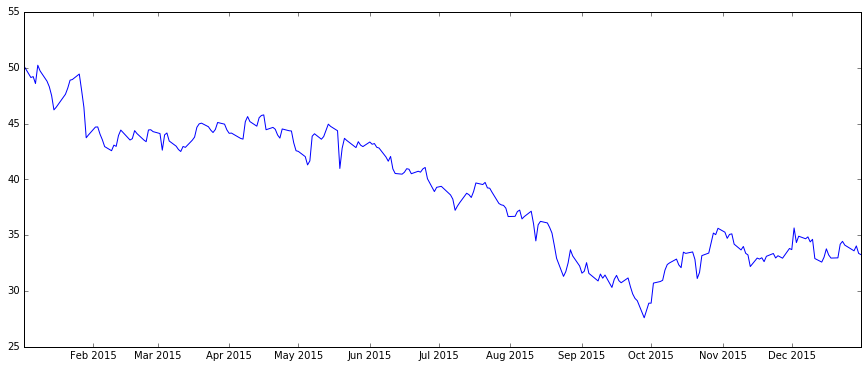

In [64]:
#畫圖看看是不是定態
plt.plot(ts)

In [65]:
#Dicky-Fuller test


from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    #下面那行是ADF的檢定
    #stattools的網頁
    #http://statsmodels.sourceforge.net/devel/generated/statsmodels.tsa.stattools.adfuller.html
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


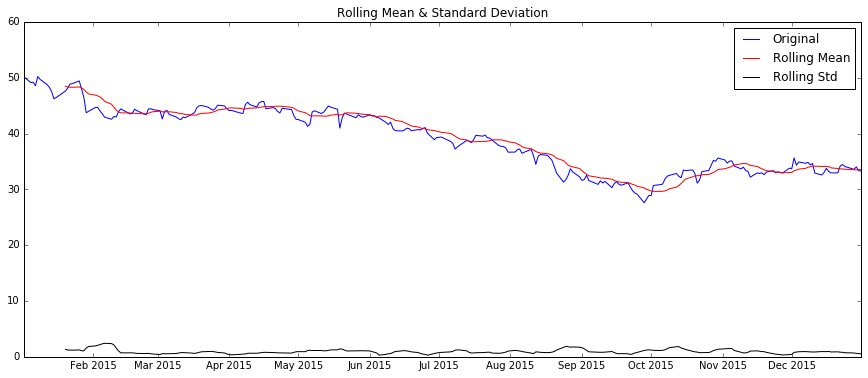

Results of Dickey-Fuller Test:
Test Statistic                  -1.501137
p-value                          0.532949
#Lags Used                       3.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (10%)            -2.573019
Critical Value (5%)             -2.873266
dtype: float64


In [66]:
test_stationarity(ts)

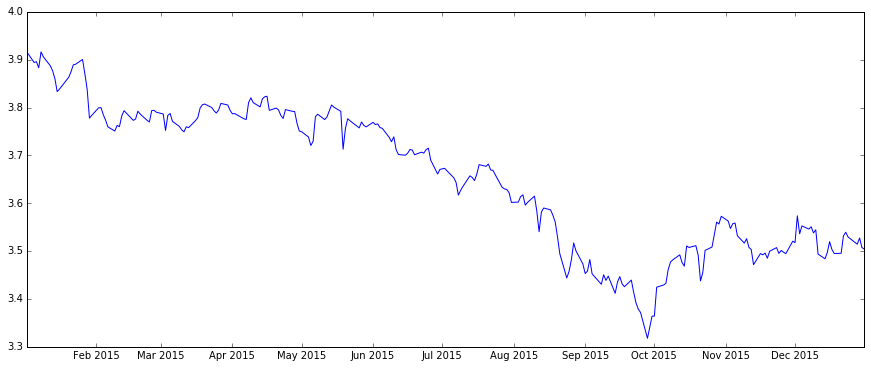

In [67]:
ts_log = np.log(ts)
plt.plot(ts_log)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
  from ipykernel import kernelapp as app


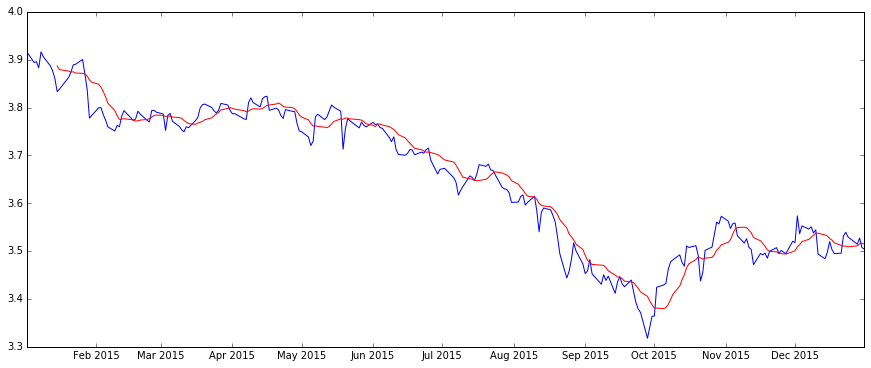

In [68]:
#方法1移動平均法
moving_avg = pd.rolling_mean(ts_log,10)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [69]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(10)

Date
2015-01-02         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
2015-01-08         NaN
2015-01-09         NaN
2015-01-12         NaN
2015-01-13         NaN
2015-01-14         NaN
2015-01-15   -0.053586
Name: Close, dtype: float64

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


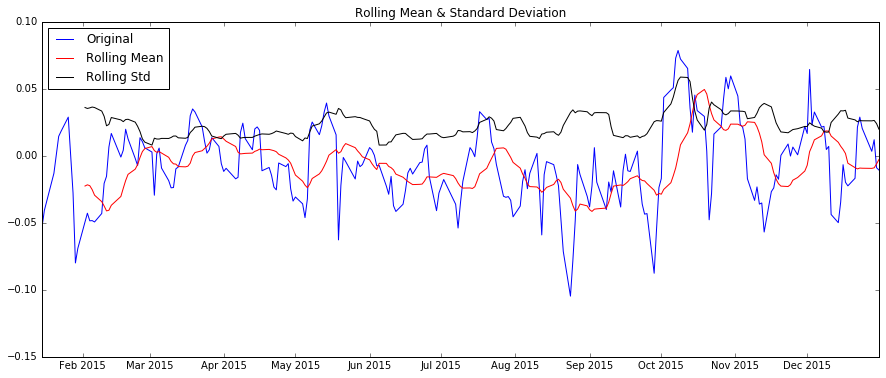

Results of Dickey-Fuller Test:
Test Statistic                  -4.792271
p-value                          0.000056
#Lags Used                       7.000000
Number of Observations Used    235.000000
Critical Value (1%)             -3.458487
Critical Value (10%)            -2.573367
Critical Value (5%)             -2.873919
dtype: float64


In [70]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,adjust=True,ignore_na=False,halflife=5).mean()
  app.launch_new_instance()


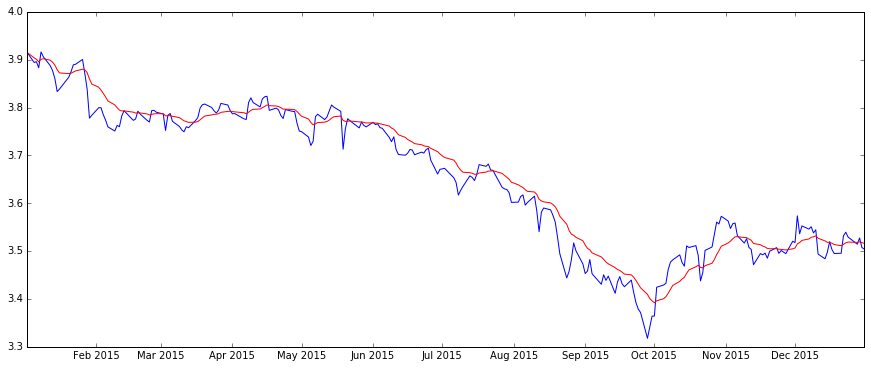

In [127]:
#方法2 exponentially weighted moving average
#比較適合用在股票預測
expwighted_avg = pd.ewma(ts_log, halflife=5)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


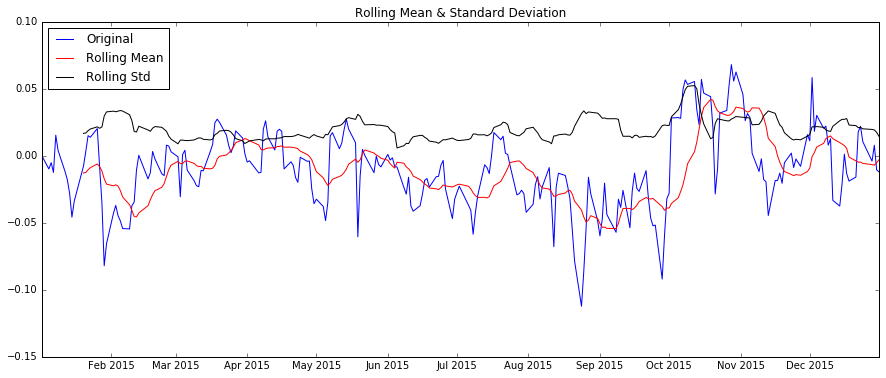

Results of Dickey-Fuller Test:
Test Statistic                  -5.017425
p-value                          0.000020
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (10%)            -2.572944
Critical Value (5%)             -2.873125
dtype: float64
Date
2015-01-02    0.000000
2015-01-05   -0.009749
2015-01-06   -0.005032
2015-01-07   -0.012325
2015-01-08    0.015467
2015-01-09    0.004056
2015-01-12   -0.011574
2015-01-13   -0.017647
2015-01-14   -0.027939
2015-01-15   -0.045714
Name: Close, dtype: float64


In [128]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)
print(ts_log_ewma_diff.head(10))

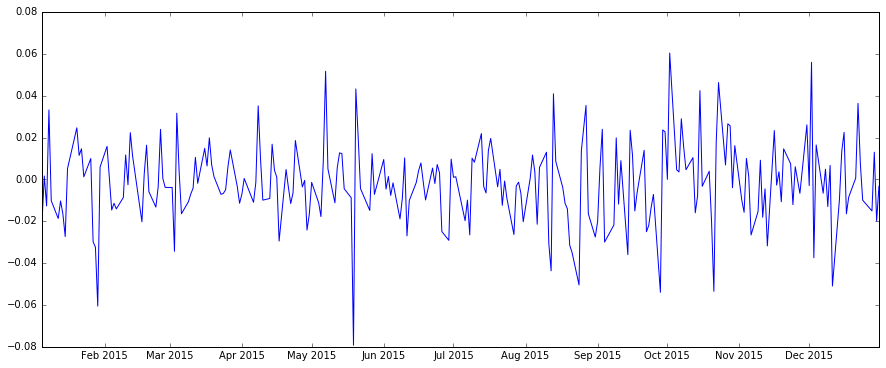

In [149]:
#Eliminating Trend and Seasonality
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


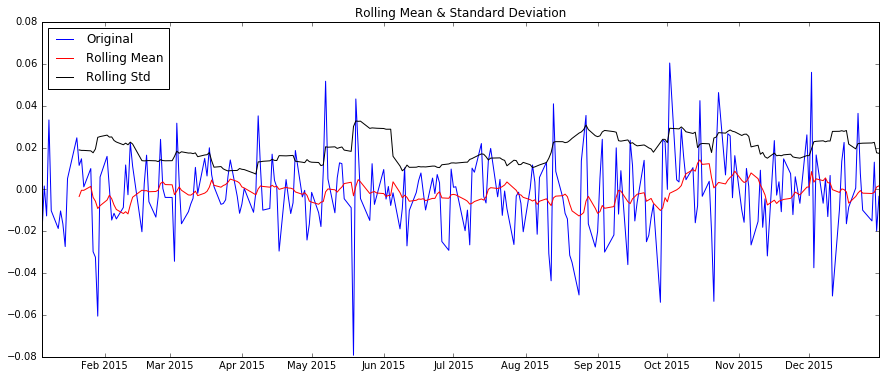

Results of Dickey-Fuller Test:
Test Statistic                -7.123580e+00
p-value                        3.668881e-10
#Lags Used                     6.000000e+00
Number of Observations Used    2.440000e+02
Critical Value (1%)           -3.457438e+00
Critical Value (10%)          -2.573122e+00
Critical Value (5%)           -2.873459e+00
dtype: float64


In [151]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

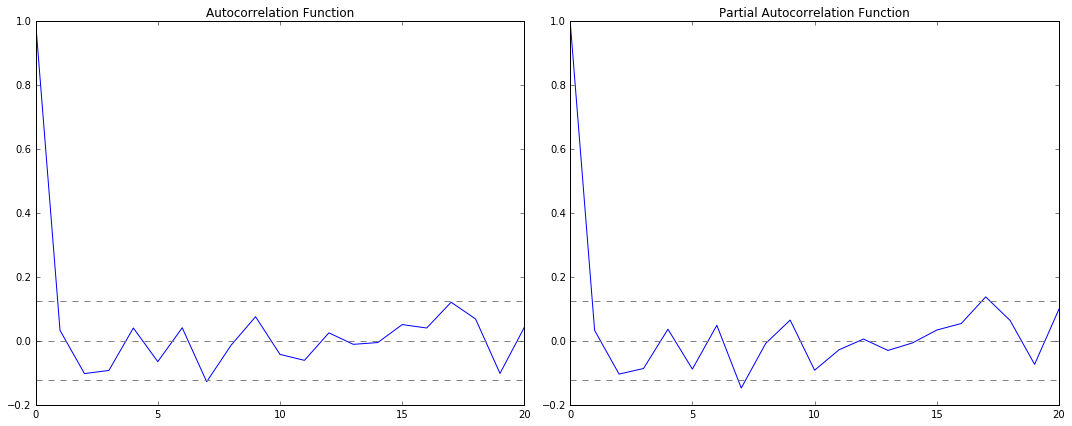

In [152]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

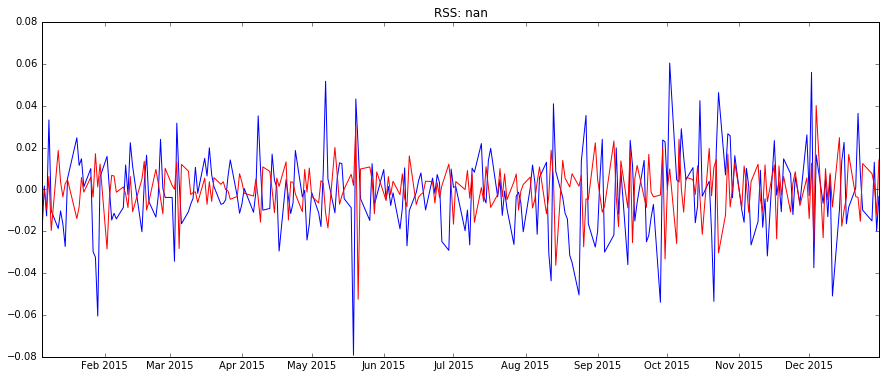

In [155]:
#run ARIMA model

from statsmodels.tsa.arima_model import ARIMA

#AR model 
model = ARIMA(ts_log_diff, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))


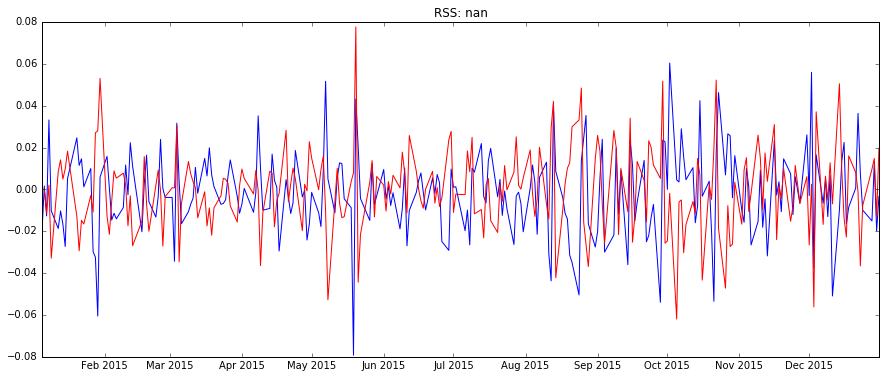

In [153]:
#MA model
model = ARIMA(ts_log_diff, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


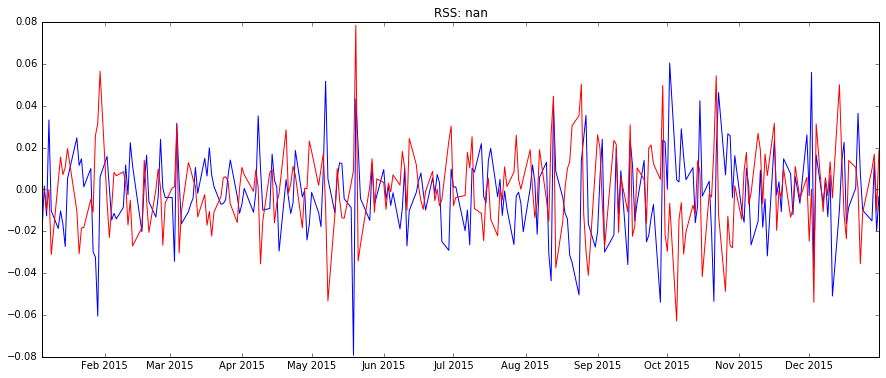

In [156]:
#ARIMA model
model = ARIMA(ts_log_diff, order=(2, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [157]:
#Taking it back to original scale
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2015-01-06    0.000016
2015-01-07   -0.009850
2015-01-08   -0.000062
2015-01-09   -0.031153
2015-01-12    0.003848
dtype: float64


In [158]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2015-01-06    0.000016
2015-01-07   -0.009834
2015-01-08   -0.009896
2015-01-09   -0.041049
2015-01-12   -0.037201
dtype: float64


In [159]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2015-01-02    3.915417
2015-01-05    3.915417
2015-01-06    3.915433
2015-01-07    3.905583
2015-01-08    3.905521
dtype: float64

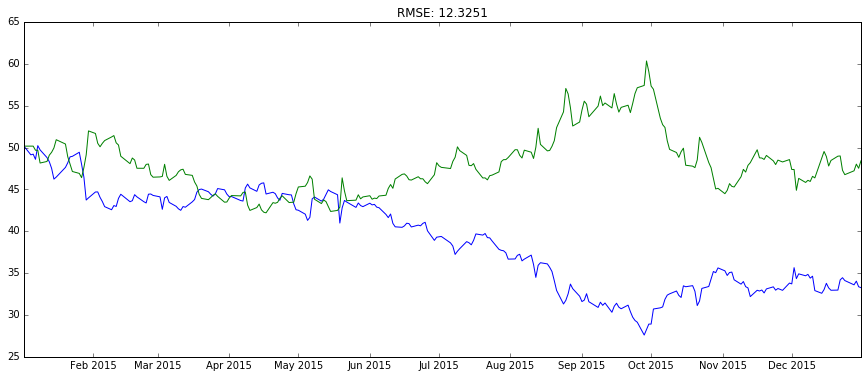

In [160]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))